In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import sobel
from scipy.sparse import linalg as linalg
from scipy.sparse import lil_matrix as lil_matrix

In [22]:
img_s1 = plt.imread("imgs1.jpg")
img_t1 = plt.imread("imgt1.jpg")
img_s2 = plt.imread("imgs2.jpg")
img_t2 = plt.imread("imgt2.jpg")
img_s3 = plt.imread("imgs3.jpg")
img_t3 = plt.imread("imgt3.jpg")
# img_s3 = plt.imread("imgs3.jpg")
img_t4 = plt.imread("imgt4.jpg")

In [13]:
def p_type(index, mask):
    if not is_in(index, mask):
        return 0
    if is_edge(index, mask):
        return 1
    return 2

def is_in(index, mask):
    return mask[index] == 1

def is_edge(index, mask):
    if not is_in(index, mask):
        return False
    
    for p in neighbors(index):
        if not is_in(p, mask):
            return True
    return False

def neighbors(ind):
    i, j = ind
    ns = [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]
    return ns

def laplace(img, ind):
    laplace = 4 * img[ind[0], ind[1]]
    for i, j in neighbors(ind):
        laplace -= img[i, j]
    return laplace

def make_matrix(points):
    points = list(points)
    N = len(points)
    A = lil_matrix((N,N))
    for i, index in enumerate(points):
        A[i,i] = 4
        for x in neighbors(index):
            if x not in points:
                continue
            j = points.index(x)
            A[i,j] = -1
    return A

def blend(img_s, img_t, mask, offset):
    indicies = zip(np.nonzero(mask)[0], np.nonzero(mask)[1])
    indicies = list(indicies)
    N = len(indicies)
    A = make_matrix(indicies)
    b = np.zeros(N)
    print("done")
    for i, index in enumerate(indicies):
        b[i] = laplace(img_s, index)
        if p_type(index, mask) == 1:
            for pt in neighbors(index):
                if not is_in(pt,mask):
                    b[i] += img_t[pt[0] + offset[0], pt[1] + offset[1]]
    
    print(A.shape, b.shape)
    x = linalg.cg(A, b, tol=1e-6)
    result = np.copy(img_t).astype(int)
    for i, index in enumerate(indicies):
        result[index[0]+offset[0], index[1] + offset[1]] = x[0][i]
    return result

def blend_img(img_s, img_t, mask, offset=(0, 0)):
    result_stack = [blend(img_s[:,:,i], img_t[:,:,i], mask, offset) for i in range(3)]
    return cv.merge(result_stack)
    

In [24]:
# nonzero = np.nonzero(np.ones_like(img_s1[:, :, 0]))
mask = np.zeros_like(img_s3[:, :, 0])
mask[5:-5, 5:-5] = 1
res1 = blend_img(img_s3, img_t4, mask, (img_t4.shape[0]//2, img_t4.shape[1]//2))
plt.imsave("result01.jpg", np.array(res1, np.uint8))

done
(7320, 7320) (7320,)
done
(7320, 7320) (7320,)
done
(7320, 7320) (7320,)


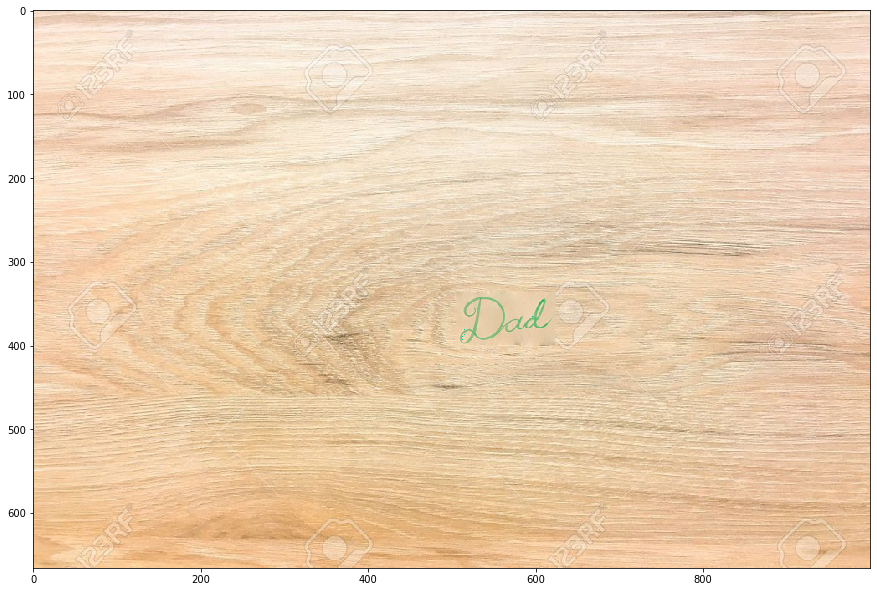

In [25]:
plt.figure(figsize=(15, 15))
plt.imshow(np.array(res1, np.uint8))

In [7]:
mask = np.zeros_like(img_s2[:, :, 0])
mask[5:-5, 5:-5] = 1
off = (img_t2.shape[0] - img_s2.shape[0] - 50, img_t2.shape[1] - img_s2.shape[1] - 40)
res2 = blend_img(img_s2, img_t2, mask, off)
plt.imsave("result02.jpg", np.array(res2, np.uint8))

hi
(5850, 5850) (5850,)
hi
(5850, 5850) (5850,)
hi
(5850, 5850) (5850,)


True

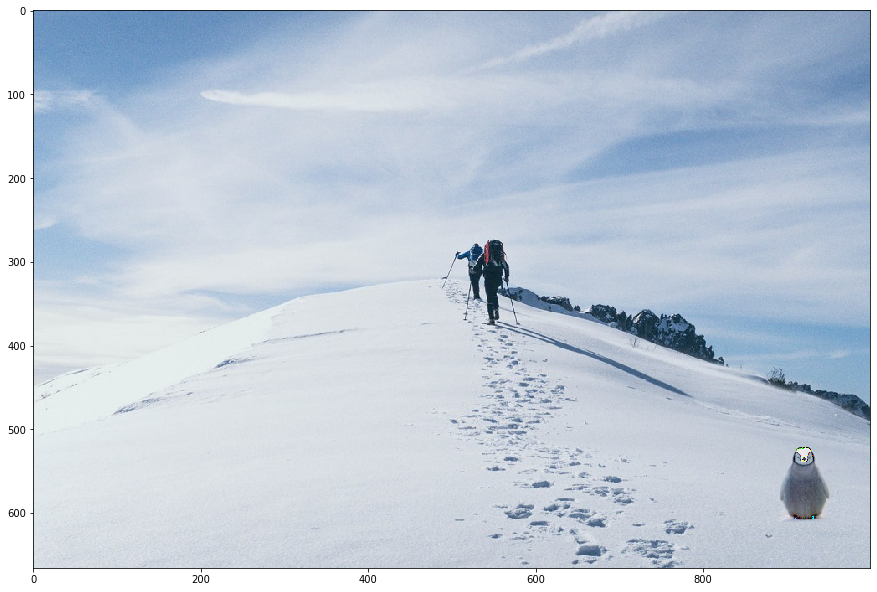

In [19]:
plt.figure(figsize=(15, 15))
plt.imshow(np.array(res2, np.uint8))

<div dir="rtl">
همان گونه که در اسلاید ها گفته شده بود، از تشکیل دستگاه معادلات برای کمینه کردن گرادیان استفاده کردیم که هر سطر آن  معادل قید های یکی پیکسل است که در سمت چپ مربوط به موارد مجهول و در سمت راست موارد معلوم قرار دارند و برابر 
    
    Af=b
    است
    
    برای بهبود سرعت، از ماتریس های اسپارس استفاده کردیم چون در هر سطر حداکثر ۵ درایه ناصفر داریم ولی به تعداد پیکسل های عکس مبدا، سطر و ستون خواهیم داشت
 
    تعریف ماتریس آ و بی نیز همان تعریفی است که در اسلاید ها آمده
</div>
